In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from functools import reduce

In [2]:
file_name = "./data/manston.csv"
manston_tavg = pd.read_csv(file_name)

In [3]:
file_name = "./data/dublin.csv"
dublin_tavg = pd.read_csv(file_name)
dublin_tavg['date'] = pd.to_datetime(dublin_tavg['date'])

In [4]:
manston_tavg['station'] = 'Manston(UK)'
dublin_tavg['station'] = 'Dublin(EI)'

In [5]:
dataset = [manston_tavg, dublin_tavg]
dataset = pd.concat(dataset)

In [6]:
dataset['month'] = pd.DatetimeIndex(dataset['date']).month

In [7]:
dataset.loc[dataset['month'] == 1,'month'] = 'Jan'
dataset.loc[dataset['month'] == 2,'month'] = 'Feb'
dataset.loc[dataset['month'] == 3,'month'] = 'Mar'
dataset.loc[dataset['month'] == 4,'month'] = 'Apr'
dataset.loc[dataset['month'] == 5,'month'] = 'May'
dataset.loc[dataset['month'] == 6,'month'] = 'June'
dataset.loc[dataset['month'] == 7,'month'] = 'July'
dataset.loc[dataset['month'] == 8,'month'] = 'Aug'
dataset.loc[dataset['month'] == 9,'month'] = 'Sep'
dataset.loc[dataset['month'] == 10,'month'] = 'Oct'
dataset.loc[dataset['month'] == 11,'month'] = 'Nov'
dataset.loc[dataset['month'] == 12,'month'] = 'Dec'

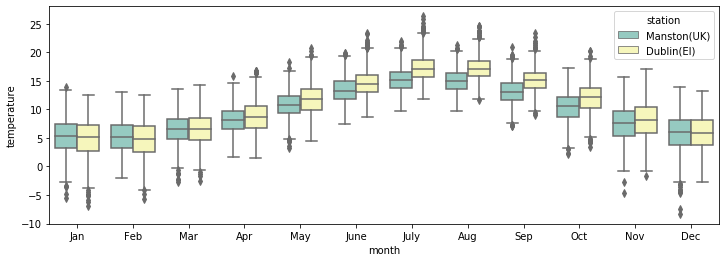

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month', y='tavg',data=dataset, hue='station', palette='Set3', ax=ax, order = ['Jan', 'Feb', 'Mar','Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct','Nov', 'Dec']).set(
    ylabel='temperature'
)
plt.show()

weather

In [9]:
df1 = pd.read_csv('./data/rain_Sculthorpe.csv')
df2 = pd.read_csv('./data/fog_Sculthorpe.csv')
df3 = pd.read_csv('./data/haze_Sculthorpe.csv')
df4 = pd.read_csv('./data/prcp_Sculthorpe.csv')
df5 = pd.read_csv('./data/tmin_Sculthorpe.csv')
df6 = pd.read_csv('./data/snow_Sculthorpe.csv')
data_frames = [df1, df2, df3, df4, df5, df6]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), data_frames).fillna(0)
df_merged

,rain,date,fog,haze,prcp,tmin,snow
0,1.0,1951-01-01,1.0,1.0,0.3,-3.3,0
1,1.0,1951-01-02,1.0,1.0,3.0,-1.1,0
2,1.0,1951-01-03,1.0,1.0,0.5,-1.7,0
3,1.0,1951-01-04,1.0,0.0,3.6,-1.7,0
4,1.0,1951-01-05,0.0,0.0,9.7,0.6,0
...,...,...,...,...,...,...,...
4742,0.0,1951-05-12,0.0,0.0,0.0,3.3,0
4743,0.0,1951-04-22,0.0,0.0,0.0,0.6,0
4744,0.0,1951-04-21,0.0,0.0,0.0,3.3,0
4745,0.0,1951-04-20,0.0,0.0,0.0,2.2,0


In [10]:
df_merged = df_merged[['date','rain','snow','haze','fog','tmin','prcp']]
df_merged['weather'] = 'sun'
df_merged

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,rain,snow,haze,fog,tmin,prcp,weather
0,1951-01-01,1.0,0,1.0,1.0,-3.3,0.3,sun
1,1951-01-02,1.0,0,1.0,1.0,-1.1,3.0,sun
2,1951-01-03,1.0,0,1.0,1.0,-1.7,0.5,sun
3,1951-01-04,1.0,0,0.0,1.0,-1.7,3.6,sun
4,1951-01-05,1.0,0,0.0,0.0,0.6,9.7,sun
...,...,...,...,...,...,...,...,...
4742,1951-05-12,0.0,0,0.0,0.0,3.3,0.0,sun
4743,1951-04-22,0.0,0,0.0,0.0,0.6,0.0,sun
4744,1951-04-21,0.0,0,0.0,0.0,3.3,0.0,sun
4745,1951-04-20,0.0,0,0.0,0.0,2.2,0.0,sun


In [11]:
df_merged.loc[(df_merged['fog'] == 1.0),'weather']  = 'fog'
df_merged

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,rain,snow,haze,fog,tmin,prcp,weather
0,1951-01-01,1.0,0,1.0,1.0,-3.3,0.3,fog
1,1951-01-02,1.0,0,1.0,1.0,-1.1,3.0,fog
2,1951-01-03,1.0,0,1.0,1.0,-1.7,0.5,fog
3,1951-01-04,1.0,0,0.0,1.0,-1.7,3.6,fog
4,1951-01-05,1.0,0,0.0,0.0,0.6,9.7,sun
...,...,...,...,...,...,...,...,...
4742,1951-05-12,0.0,0,0.0,0.0,3.3,0.0,sun
4743,1951-04-22,0.0,0,0.0,0.0,0.6,0.0,sun
4744,1951-04-21,0.0,0,0.0,0.0,3.3,0.0,sun
4745,1951-04-20,0.0,0,0.0,0.0,2.2,0.0,sun


In [12]:
df_merged.loc[(df_merged['haze'] == 1.0),'weather']  = 'drizzle'
df_merged

,date,rain,snow,haze,fog,tmin,prcp,weather
0,1951-01-01,1.0,0,1.0,1.0,-3.3,0.3,drizzle
1,1951-01-02,1.0,0,1.0,1.0,-1.1,3.0,drizzle
2,1951-01-03,1.0,0,1.0,1.0,-1.7,0.5,drizzle
3,1951-01-04,1.0,0,0.0,1.0,-1.7,3.6,fog
4,1951-01-05,1.0,0,0.0,0.0,0.6,9.7,sun
...,...,...,...,...,...,...,...,...
4742,1951-05-12,0.0,0,0.0,0.0,3.3,0.0,sun
4743,1951-04-22,0.0,0,0.0,0.0,0.6,0.0,sun
4744,1951-04-21,0.0,0,0.0,0.0,3.3,0.0,sun
4745,1951-04-20,0.0,0,0.0,0.0,2.2,0.0,sun


In [13]:
df_merged.loc[(df_merged['rain'] == 1.0) | ((df_merged['prcp'] >0) & df_merged['tmin']>0),'weather']  = 'rain'
df_merged

,date,rain,snow,haze,fog,tmin,prcp,weather
0,1951-01-01,1.0,0,1.0,1.0,-3.3,0.3,rain
1,1951-01-02,1.0,0,1.0,1.0,-1.1,3.0,rain
2,1951-01-03,1.0,0,1.0,1.0,-1.7,0.5,rain
3,1951-01-04,1.0,0,0.0,1.0,-1.7,3.6,rain
4,1951-01-05,1.0,0,0.0,0.0,0.6,9.7,rain
...,...,...,...,...,...,...,...,...
4742,1951-05-12,0.0,0,0.0,0.0,3.3,0.0,sun
4743,1951-04-22,0.0,0,0.0,0.0,0.6,0.0,sun
4744,1951-04-21,0.0,0,0.0,0.0,3.3,0.0,sun
4745,1951-04-20,0.0,0,0.0,0.0,2.2,0.0,sun


In [14]:
df_merged.loc[(df_merged['snow'] >0) & (df_merged['tmin']<0),'weather']  = 'snow'

In [15]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_periods = df_merged[(df_merged['date'].dt.year == 1951) | (df_merged['date'].dt.year == 1955) | (df_merged['date'].dt.year == 1959) | (df_merged['date'].dt.year == 1963)].reset_index()
df_periods['year'] = df_periods['date'].dt.year
df_periods

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,date,rain,snow,haze,fog,tmin,prcp,weather,year
0,0,1951-01-01,1.0,0,1.0,1.0,-3.3,0.3,rain,1951
1,1,1951-01-02,1.0,0,1.0,1.0,-1.1,3.0,rain,1951
2,2,1951-01-03,1.0,0,1.0,1.0,-1.7,0.5,rain,1951
3,3,1951-01-04,1.0,0,0.0,1.0,-1.7,3.6,rain,1951
4,4,1951-01-05,1.0,0,0.0,0.0,0.6,9.7,rain,1951
...,...,...,...,...,...,...,...,...,...,...
1454,4742,1951-05-12,0.0,0,0.0,0.0,3.3,0.0,sun,1951
1455,4743,1951-04-22,0.0,0,0.0,0.0,0.6,0.0,sun,1951
1456,4744,1951-04-21,0.0,0,0.0,0.0,3.3,0.0,sun,1951
1457,4745,1951-04-20,0.0,0,0.0,0.0,2.2,0.0,sun,1951


In [16]:
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])
alt.Chart(df_periods).mark_tick().encode(
    x='date',
    y='weather:N',
    color=alt.Color('weather:N', scale=scale),
).properties(
    width=210,
    height=70,
).facet(
    facet='year:N',
    columns=2
).resolve_scale(x='independent')

alt.FacetChart(...)